In [14]:
from sklearn.datasets import load_digits

In [15]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [16]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

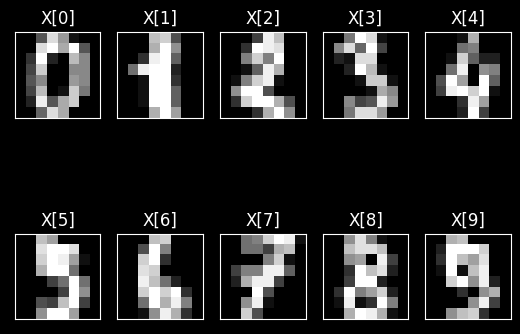

In [26]:
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True)
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X[5*i+j].reshape((8,8)), cmap="gray")
        ax[i,j].set_title(f"X[{5*i+j}]")
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

We don't need `X`. Instead, by using `y` and `np.random`, we'd like to create
a bunch of independent weak learners, which together form a strong learner.

#### Ref.
- <>

In [27]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [28]:
import numpy as np

In [40]:
class Weak:
    def __init__(self, p=0.51):
        self.p = p

    def predict(self):
        # TODO: pass a rng
        #incorrect = np.random.randint(low=0, high=10, size=len(y))
        incorrect = (y - 1) % 10
        correct = y
        n_True = int(self.p * len(y))
        n_False = len(y) - n_True
        conditions = [True] * n_True + [False] * n_False
        np.random.shuffle(conditions)
        y_pred = np.where(conditions, correct, incorrect)
        return y_pred

In [41]:
weak = Weak()

In [42]:
y_pred = weak.predict()

- <https://scikit-learn.org/stable/modules/model_evaluation.html>

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
np.array_equal(Weak().predict(), Weak().predict())

False

In [45]:
accuracy_score(y, y_pred)

0.5097384529771842

In [62]:
print(f"{Weak().predict()[:10]}")
print(f"{Weak().predict()[:10]}")
print(f"{Weak().predict()[:10]}")

[9 1 2 2 4 4 6 6 8 9]
[9 0 2 2 4 5 5 6 7 9]
[9 1 1 3 3 4 5 6 7 8]


In [61]:
k = 10
weaks = [Weak() for _ in range(k)]
accuracies= [accuracy_score(y, weak.predict()) for weak in weaks]
print(f"{accuracies = }")

accuracies = [0.5097384529771842, 0.5097384529771842, 0.5097384529771842, 0.5097384529771842, 0.5097384529771842, 0.5097384529771842, 0.5097384529771842, 0.5097384529771842, 0.5097384529771842, 0.5097384529771842]


In [54]:
k = 10_000
weaks = [Weak() for _ in range(k)]
pred_list = [weak.predict() for weak in weaks]

### Reminder on `Counter`

In [55]:
from collections import Counter

In [56]:
digits = np.random.randint(low=0, high=10, size=100)
c = Counter(digits)
print(f"{c.most_common(3) = }")
print(f"{c.most_common(1) = }")

c.most_common(3) = [(2, 16), (9, 14), (1, 13)]
c.most_common(1) = [(2, 16)]


In [57]:
from collections import Counter
from tqdm.auto import tqdm

def hard_vote(pred_list):
    final_pred = []
    m = len(pred_list[0])
    for i in tqdm(range(m)):
        ith_preds = [pred[i] for pred in pred_list]
        counter = Counter(ith_preds)
        final_pred.append(counter.most_common(1)[0][0])
    return final_pred

In [58]:
y_vote = hard_vote(pred_list)
accuracy_score(y, y_vote)

  0%|          | 0/1797 [00:00<?, ?it/s]

0.9710628825820813